In [1]:
'''
K-Means
군집
clustering

- csv 파일(데이터)을 넣어주면,
- 데이터를 그루핑(clustering) 해주는 앱
'''

'\nK-Means\n군집\nclustering\n\n- csv 파일(데이터)을 넣어주면,\n- 데이터를 그루핑(clustering) 해주는 앱\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df[df['Annual Income (k$)'] == df['Annual Income (k$)'].max()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


In [7]:
df[df['Age'] == df['Age'].max()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


In [8]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# df.dropna(inplace=True)

In [10]:
df.head(2) # 목표는 비슷한 사람끼리 묶는거. 이건 y값이 없음.

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [11]:
X = df.iloc[:, 1:]
X.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [12]:
# 값을 바꾸는걸 incoding이라고 함. 레이블인코등 / 원핫인코딩
df['Genre'].nunique() # 2 나옴

2

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [16]:
X['Genre'] = label_encoder.fit_transform(X['Genre'])
X # 남자 1, 여자 0 됨

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_scaled = scaler.fit_transform( X )
X_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3, random_state=2, n_init='auto')

In [22]:
kmeans.fit_predict(X_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1])

In [23]:
# 경고
# https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

In [24]:
y_pred = kmeans.fit_predict(X_scaled)

In [25]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1])

In [26]:
df['Group'] = y_pred

In [27]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [28]:
wcss = [] # 실무에선 for문으로 그래프 먼저 그림.
for k in range(1, 10+1): # 군집 갯수 1~10의 데이터
    kmeans = KMeans(n_clusters= k, random_state= 5, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia는 값이 얼마나 모여있는지 수치화

In [29]:
wcss

[86.68148216035951,
 37.27227241211877,
 29.63233438025293,
 22.470436780237602,
 19.08172248610557,
 17.024810586072856,
 14.522587341466249,
 12.247907726470766,
 10.600432969550855,
 10.363482413214054]

In [30]:
import numpy as np

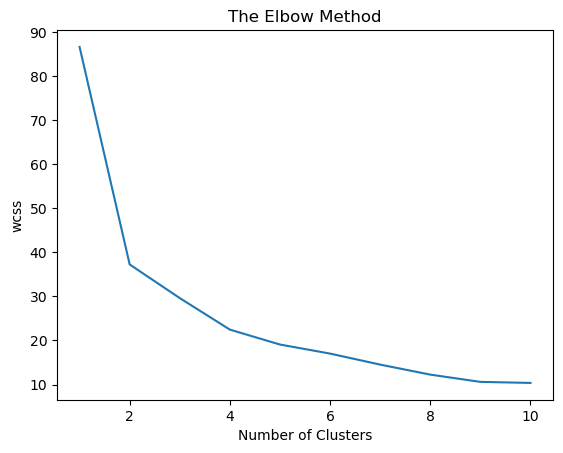

In [31]:
x = np.arange(1, 10+1)
plt.plot(x, wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, random_state=5, n_init='auto')

In [34]:
y_pred = kmeans.fit_predict(X_scaled)

In [35]:
y_pred

array([0, 0, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 0, 3, 0, 2, 1, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 1, 2, 1, 2, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 2, 3, 2, 3, 2, 1, 2, 2, 0, 3, 3, 2, 0,
       3, 3, 0, 1, 2, 3, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 0, 2, 3, 1, 0, 3, 1, 2, 0, 1, 3, 2, 0, 2, 1, 3, 2, 2, 2,
       2, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 3, 0, 0, 1, 3, 0, 1, 1, 0, 0, 2, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0])

In [36]:
df['Group'] = y_pred

In [37]:
df.loc[df['Group'] == 3, ].head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
2,3,Female,20,16,6,3
6,7,Female,35,18,6,3
12,13,Female,58,20,15,3


In [38]:
df[df['Group'] == 3].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
2,3,Female,20,16,6,3
6,7,Female,35,18,6,3
12,13,Female,58,20,15,3
16,17,Female,35,21,35,3
22,23,Female,46,25,5,3
